# <center>Converting 3D model (STL) to NIfTI images</center>

##### Loading the required libraries

In [2]:
import trimesh
import numpy as np  
import vtkplotter as vtk
import ants

##### Converting GLB file to STL file

In [6]:
mesh = trimesh.load("./Allen_Connectome_ICP_Data/Allen_Connectome_ICP.glb", force='mesh')

In [7]:
mesh

<trimesh.Trimesh(vertices.shape=(3284199, 3), faces.shape=(1097319, 3))>

In [8]:
mesh.vertices

TrackedArray([[ 89.91388013, -23.79783018,   4.57729614],
              [ 89.9468021 , -23.78667735,   4.64763965],
              [ 90.0838928 , -23.90569847,   4.55858664],
              ...,
              [ 22.6260777 ,   6.57289308,  -7.26416659],
              [ 23.77129068,   9.43897836,  -4.57656721],
              [ 27.91606808,   8.7681656 ,  -5.55222581]])

In [9]:
mesh.faces

TrackedArray([[      0,       1,       2],
              [      3,       4,       5],
              [      6,       7,       8],
              ...,
              [3284190, 3284191, 3284192],
              [3284193, 3284194, 3284195],
              [3284196, 3284197, 3284198]])

In [10]:
_ = mesh.export('./Allen_Connectome_ICP_Data/Allen_Connectome_ICP.stl')

# Converting STL file to NIfTI File

In [11]:
mesh_stl = trimesh.load_mesh("./Allen_Connectome_ICP_Data/Allen_Connectome_ICP.stl", remove_empty_areas=False)

In [12]:
mesh_stl

<trimesh.Trimesh(vertices.shape=(548957, 3), faces.shape=(1097319, 3))>

##### Displaying the image

In [15]:
mesh_stl.visual.face_colors = [100, 100, 100, 255]
#mesh_stl.show(viewer='gl')

SceneViewer(width=1800, height=755)

In [1]:
#pc1 = vtk.Points(mesh_stl.vertices, r=10)
#vtk.show([mesh_stl,pc1], N=1, bg="white", axes=1)

##### Generating the voxel grid

In [17]:
volume=mesh_stl.voxelized(pitch=0.5)

In [18]:
voxel_grid=volume.matrix
np_voxel_grid=np.asarray(voxel_grid*1.)

In [19]:
np_voxel_grid.shape

(364, 307, 290)

In [20]:
np_voxel_grid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

##### Converting the numpy voxel grid to ants image and storing it in nifti format

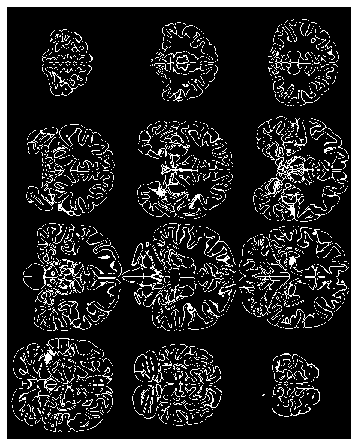

In [21]:
img=ants.from_numpy(np_voxel_grid)
ants.plot(img)

##### Saving the nifti file

In [23]:
ants.image_write(img,'./Allen_Connectome_ICP_Data/Allen_Connectome_ICP.nii')

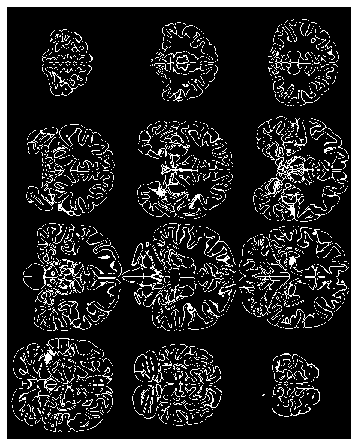

In [24]:
img2=ants.core.ants_image_io.image_read('./Allen_Connectome_ICP_Data/Allen_Connectome_ICP.nii')
ants.plot(img2)